In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
%load_ext autoreload
%autoreload
exec(open("plot_utils.py").read())

/Users/adsurbum/anaconda2/envs/py371/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
%%time
country_name = 'Belgium'
# file_name = '../output/25-Apr-ode-bug-fix/inference/{}.npz'.format(country_name)
# file_name = '../output-tmp/2020-04-29-prior-walkers-autocorr-model1/inference/{}.npz'.format(country_name)
# file_name = '../output-tmp/2020-04-30-test/inference/{}.npz'.format(country_name)
file_name = '../output/2020-05-01-more-steps-normal/inference/{}.npz'.format(country_name)
# data = load_data(file_name)

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 7.87 µs


In [5]:
%%time
means = []
medians = []
for l in [int(a) for a in [1e5,2e5,3e5,4e5,5e5,6e5,7e5,8e5,9e5,1e6,2e6,3e6,4e6,5e6,6e6,7e6,8e6,9e6,
                          1e7,2e7,3e7,4e7,5e7,6e7,7e7,8e7,9e7]]:
    load_data(file_name,0.6,l)
    means.append([sample[:,i].mean() for i in range(len(var_names))])
    medians.append([np.median(sample[:,i]) for i in range(len(var_names))])
    print(calc_DIC(),calc_LoglikMAP(),calc_τ_CI())

-444.9 -256.38 7.34
-290.81 -179.19 7.03
-276.11 -171.72 6.93
-273.35 -170.39 7.07
-264.3 -165.92 6.92
-256.33 -161.99 6.79
-269.87 -168.72 6.85
-272.62 -170.05 6.91
-257.02 -162.24 6.96
-254.45 -160.93 6.98
-270.74 -169.13 7.11
-283.62 -175.53 7.11
-303.77 -185.6 7.21


ValueError: cannot convert float NaN to integer

In [6]:
list(zip(var_names,np.array(list(zip(means))).T))

[('Z', array([[3.88991638, 3.93994157, 3.83288347, 3.81953665, 3.86415419,
          3.85446798, 3.86529579, 3.87305926, 3.87682117, 3.86313427,
          3.86504111, 3.84061622, 3.82411305,        nan]])),
 ('D', array([[3.58325444, 3.54271901, 3.47036263, 3.50048706, 3.51130511,
          3.51772055, 3.51378587, 3.54036619, 3.54012988, 3.52065442,
          3.50326861, 3.52877847, 3.55380216,        nan]])),
 ('μ', array([[0.51214342, 0.501431  , 0.48615459, 0.47714322, 0.49210575,
          0.49253324, 0.49425121, 0.48975728, 0.4922874 , 0.492388  ,
          0.48927615, 0.48526053, 0.48294118,        nan]])),
 ('β', array([[1.09499015, 1.0892602 , 1.10262278, 1.1095285 , 1.09708639,
          1.08888477, 1.09302048, 1.09996662, 1.10455167, 1.1072735 ,
          1.11072101, 1.10848024, 1.10839264,        nan]])),
 ('α1', array([[0.30827439, 0.30196398, 0.29989213, 0.28648933, 0.28015636,
          0.28256223, 0.28199199, 0.2785787 , 0.27062093, 0.26894276,
          0.27812842, 0.28

In [7]:
list(zip(var_names,np.array(list(zip(medians))).T))

[('Z', array([[4.04844435, 4.09760773, 3.99193623, 3.94568226, 4.00355695,
          3.99096659, 4.00524442, 4.01779105, 4.01738353, 3.9951312 ,
          4.0067693 , 3.98168171, 3.96265349,        nan]])),
 ('D', array([[3.59087828, 3.54526089, 3.43803246, 3.47403792, 3.49983947,
          3.51658513, 3.51040991, 3.54363001, 3.54181185, 3.50913572,
          3.48789225, 3.52085798, 3.56213098,        nan]])),
 ('μ', array([[0.49984756, 0.47756912, 0.44876449, 0.44163142, 0.46061423,
          0.46692037, 0.46847753, 0.46298024, 0.46426587, 0.46070098,
          0.45773165, 0.45308946, 0.44944224,        nan]])),
 ('β', array([[1.07480256, 1.05372266, 1.0796704 , 1.08823184, 1.07110983,
          1.06220102, 1.06720562, 1.07803261, 1.08417201, 1.08854165,
          1.09235761, 1.08932609, 1.08998922,        nan]])),
 ('α1', array([[0.24434295, 0.24621336, 0.2457175 , 0.23975559, 0.2329734 ,
          0.2330947 , 0.2363733 , 0.23442285, 0.22968866, 0.22913286,
          0.23253541, 0.23

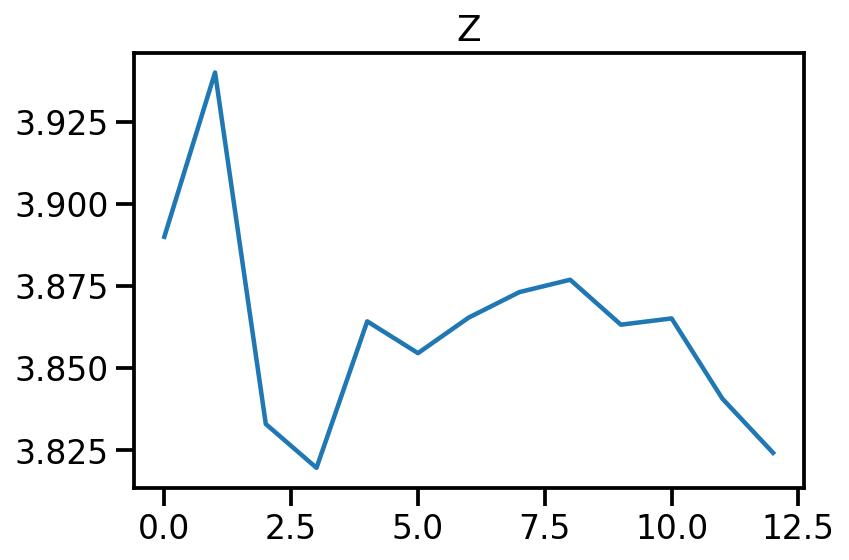

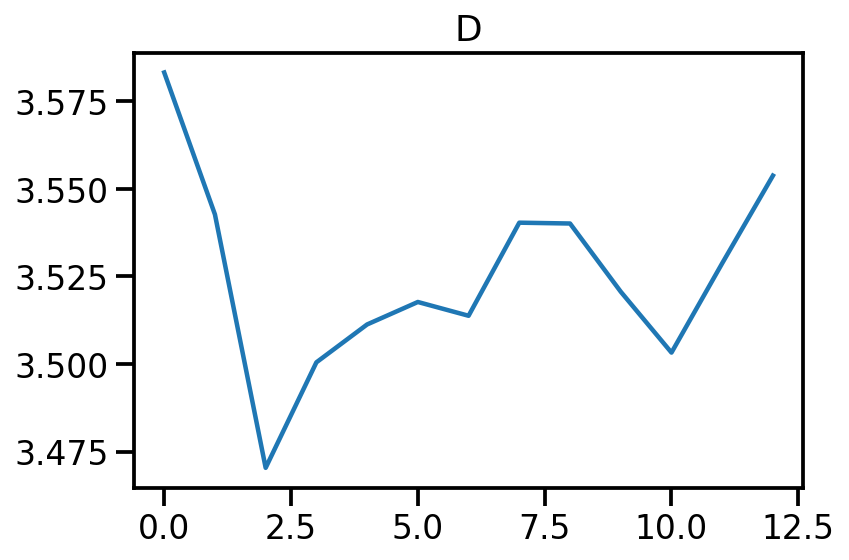

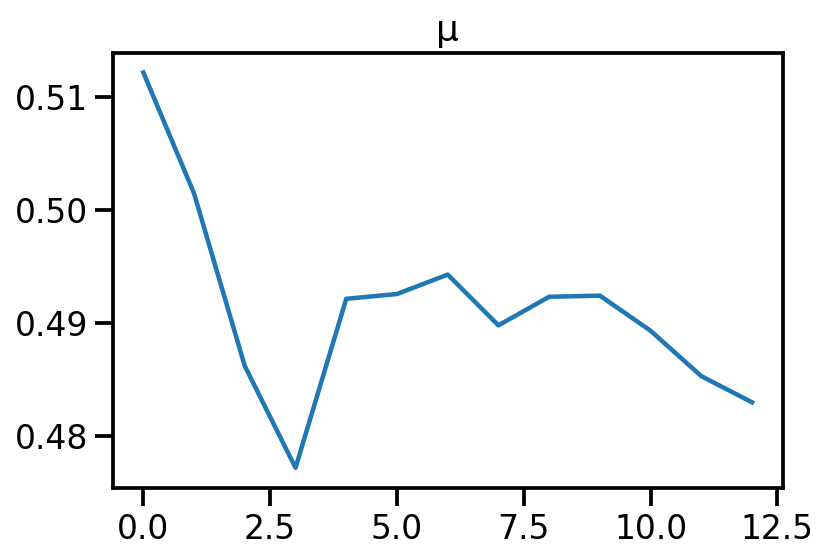

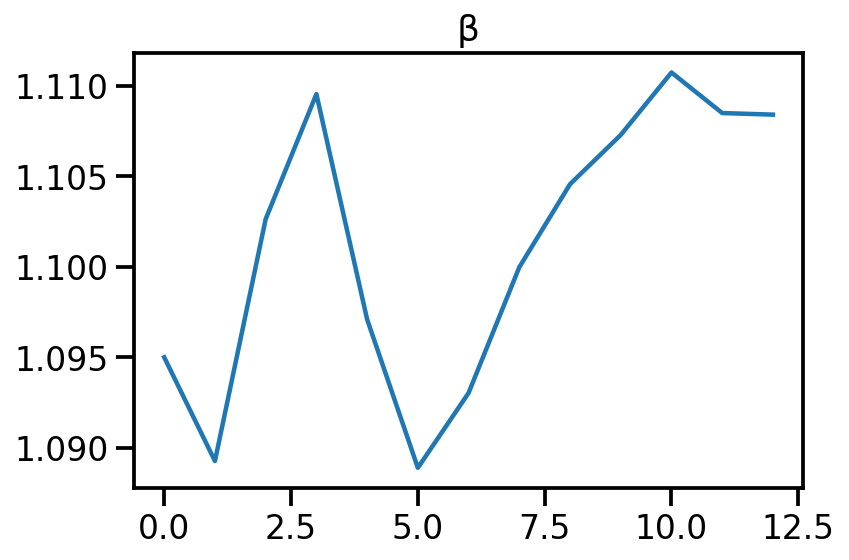

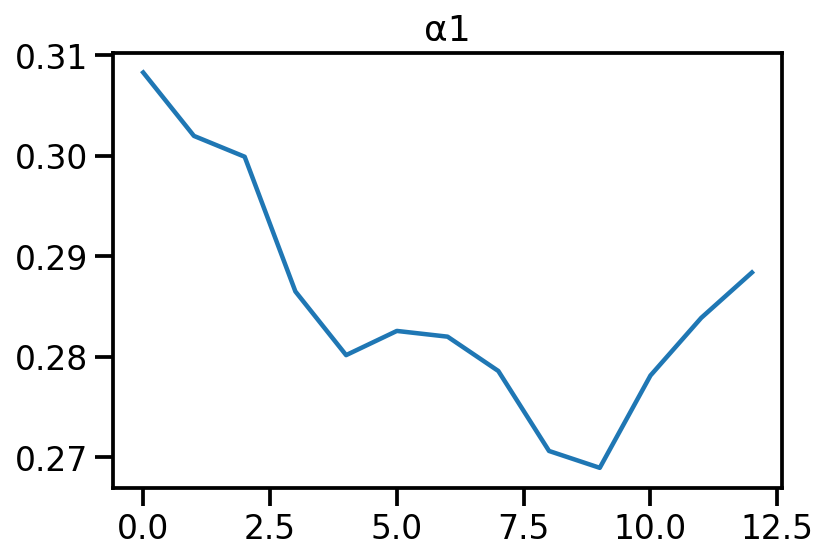

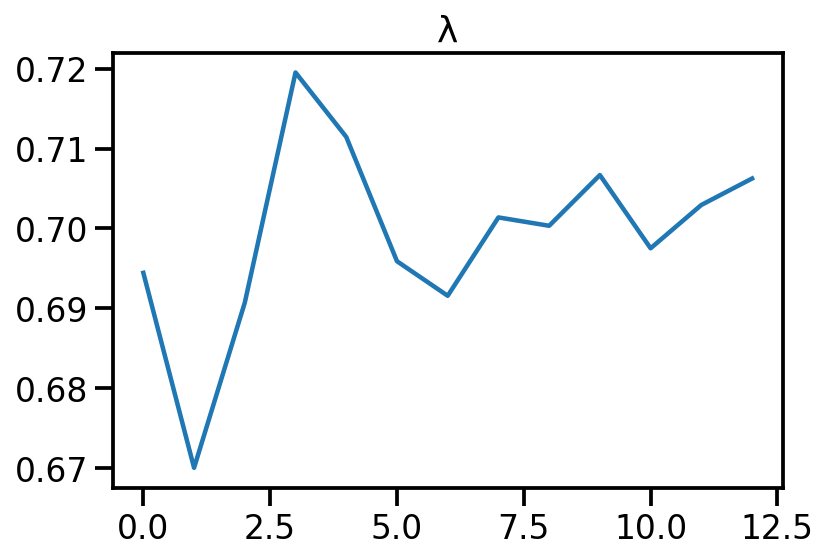

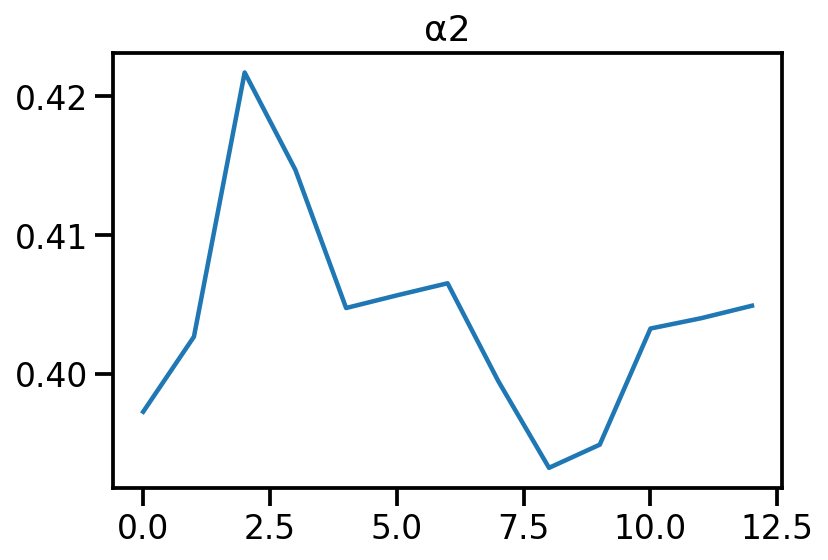

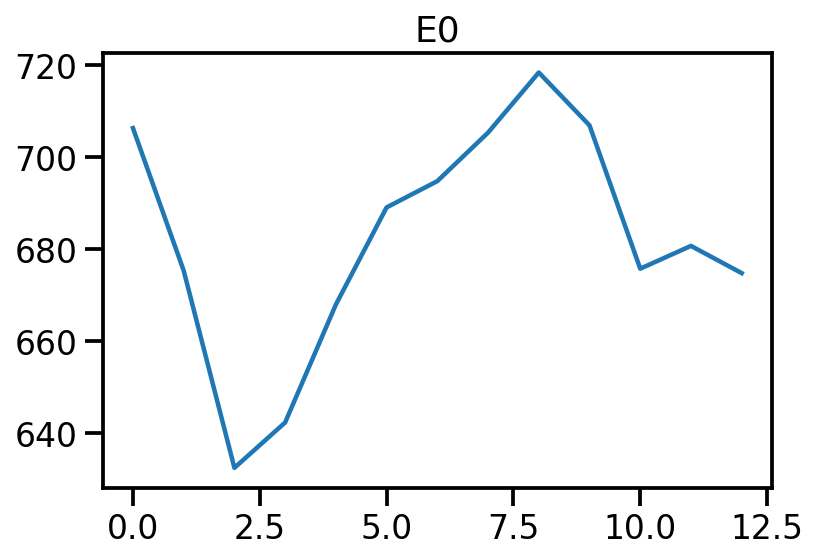

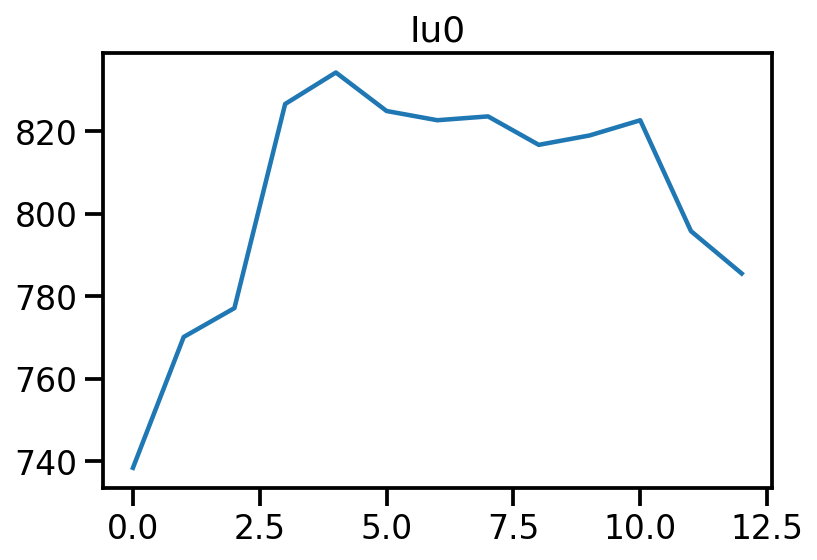

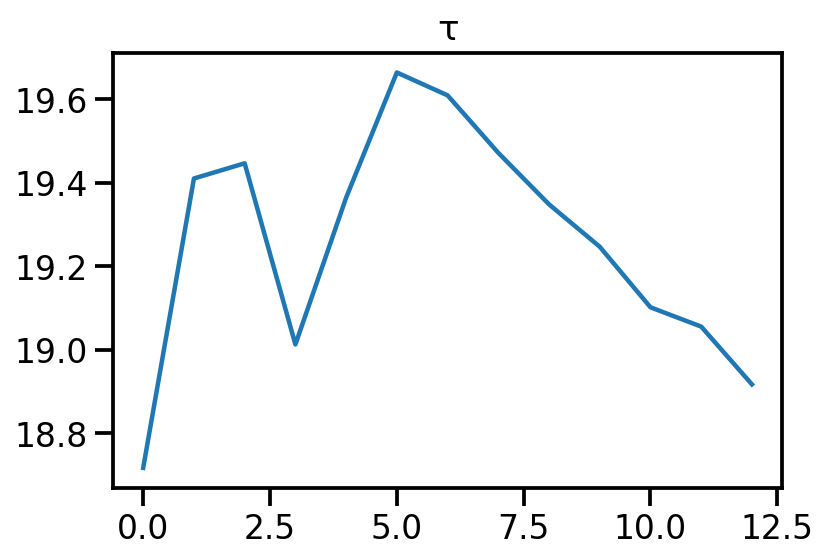

In [9]:
import matplotlib.pyplot as plt
for i,a in enumerate(np.array(list(zip(means))).T):
    plt.title(var_names[i])
    plt.plot(a[0])
    plt.show()